## Definition du dataset
Notre dataset s'agit d'un ensemble de données sur les clients d'une banque, contenant des informations telles que l'âge, le salaire, l'état matrimonial, la limite de la carte de crédit, la catégorie de carte de crédit, etc. Il y a presque 18 fonctionnalités au total. 
Le dataset comprend 10 000 clients, dont seulement 16,07% ont quitté la banque.

## Description des colonnes 
- CLIENTNUM : cette variable représente le numéro de client.
- Attrition_Flag : cette variable permet de distinguer entre les clients qui sont susceptibles de rester fidèles à l'entreprise et ceux qui risquent de partir. Elle prend deux valeurs : "Existing Customer" (client existant) et "Attrited Customer" (client ayant résilié ou sur le point de résilier).
- Customer_Age : cette variable représente l’âge de client. 
- Gender : cette variable représente le genre de client, homme ou femme.
- Dependent_count : cette variable décrit le nombre de personnes qui dépendent financièrement ou autrement d'une autre personne, comme des enfants, des personnes âgées ou des membres de la famille handicapée.
- Education_Level : cette variable représente le niveau d’éducation de chaque client. Elle prend 7 valeurs : "High School", "Unknown ", " Uneducated ", " College ", " Graduate ", "Post-Graduate" et "Doctorate". 
- Marital_Status : cette variable représente l’état civil de chaque client. Elle prend 4 valeurs : "Unknown ", "Married", "Single","Divorced". 
- Income_Category : cette variable représente la catégorie de revenu de chaque client. Elle prend 4 catégories : "Less than $40K","$40K - $60K","$60K - $80K","$80K - $120K", $120K +" et "Unknown ". 
- Card_Category : cette variable représente type de carte de chaque client, Elle prend 4 valeurs : "Blue","Gold", Silver", "Platinum".
- Months_on_book : cette variable désigne la durée pendant laquelle un client a été en possession d'un produit financier, tel qu'un compte bancaire, une carte de crédit…
- Total_Relationship_Count : cette variable désigne le nombre total de produits ou de services qu'un client détient auprès d'une institution financière donnée.
- Months_Inactive_12_mon : cette variable décrit la période de temps pendant laquelle un compte ou une carte de crédit n'a pas été utilisé pour des transactions sur une période de 12 mois. 
- Contacts_Count_12_mon : cette variable représente le nombre de fois qu’un client à contacter le service client. 
- Credit_Limit : cette variable représente le montant maximum que l'institution financière accorde à un client pour les transactions sur une carte de crédit.
- Total_Revolving_Bal : cette variable représente le montant total dû sur une carte de crédit qui peut être reporté d'un mois à l'autre.
- Avg_Open_To_Buy : cette variable désigne la moyenne du montant disponible pour les achats sur une période donnée. 
- Total_Amt_Chng_Q4_Q1 : cette variable représente la variation du montant total des transactions ou des soldes sur une période donnée.
- Total_Trans_Amt : cette variable désigne le montant global des transactions effectuées sur un compte ou une carte sur une période donnée.
- Total_Trans_Ct : cette variable désigne le nombre total de transactions effectuées sur un compte ou une carte de crédit sur une période donnée.
- Total_Ct_Chng_Q4_Q1 : cette variable représente la variation du nombre total de transactions effectuées sur une période donnée, en comparant les données du quatrième trimestre d'une année à celles du premier trimestre de l'année suivante.
- Avg_Utilization_Ratio : cette variable désigne la moyenne du pourcentage de crédit utilisé par rapport à la limite de crédit disponible sur une période donnée.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df = pd.read_csv(r'C:\Users\dell\Downloads\archive\BankChurners.csv')

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Modification effectuée sur la Dataset 
Élimination de 3 colonnes qui représentent le numéro de client et les deux colonnes qui sont utilisables comme entrées pour un modèle de classification naïve bayésienne

In [3]:
data = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)

In [13]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [12]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## ANOVA1

###### 
 l'ANOVA à un facteur nécessite une seule variable quantitative et une seule variable qualitative. On a choisi:
- "le nombre total de transactions effectuées sur un compte ou une carte de crédit" comme variable quantitave
- "la catégorie de revenu" de chaque client comme variable quantitave

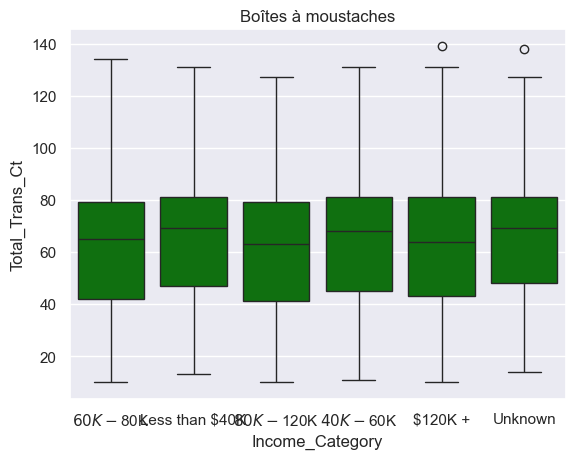

In [15]:
sns.set()

ax = sns.boxplot(x="Income_Category", y="Total_Trans_Ct", data=data, color='green')
plt.xlabel('Income_Category')
plt.ylabel('Total_Trans_Ct')
plt.title('Boîtes à moustaches')
plt.show()

### Interpretation
- D'après la figure on remarque que les boîtes à moustaches se différent d'une modalité à une autre de la variable "Income_Category", ce qui signifie l'influence de cette variable sur notre variable quantitative "Total_Trans_Ct".

In [16]:
anova_churner = smf.ols('Total_Trans_Ct~Income_Category', data=data).fit()
sm.stats.anova_lm(anova_churner)

,df,sum_sq,mean_sq,F,PR(>F)
Income_Category,5.0,1.995799e+04,3991.597459,7.267204,8.362733e-07
Residual,10121.0,5.559079e+06,549.261813,NaN,NaN


### Interpretation
- On remarque que p_value = 8.362733e-07 < 5%, ce qui confirme l'influence de la variable qualitative "Income_Category" sur la variable quantitative "Total_Trans_Ct".

####
 On a choisi:

- "le montant maximum" comme variable quantitave
- "type de carte" de chaque client comme variable quantitave

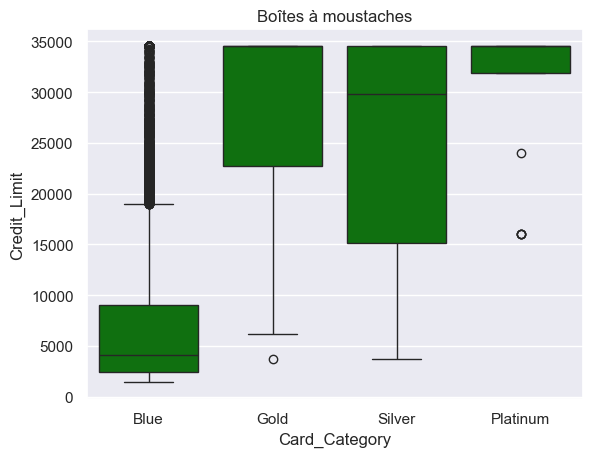

In [18]:
sns.set()

ax = sns.boxplot(x="Card_Category", y="Credit_Limit", data=data, color='green')
plt.xlabel('Card_Category')
plt.ylabel('Credit_Limit')
plt.title('Boîtes à moustaches')
plt.show()

### Interpretation
- D'après la figure on remarque que les boîtes à moustaches se différent d'une modalité à une autre de la variable "Card_Category", ce qui signifie l'influence de cette variable sur notre variable quantitative "Credit_Limit".

In [19]:
anova_churner = smf.ols('Credit_Limit~Card_Category', data=data).fit()
sm.stats.anova_lm(anova_churner)

,df,sum_sq,mean_sq,F,PR(>F)
Card_Category,3.0,2.237388e+11,7.457960e+10,1232.144058,0.0
Residual,10123.0,6.127281e+11,6.052832e+07,NaN,NaN


### Interpretation
- On remarque que p_value = 0.0 < 5%, ce qui confirme l'influence de la variable qualitative "Card_Category" sur la variable quantitative "Credit_Limit".

## ANOVA2

### Interpretation
l'ANOVA à deux facteurs nécessite deux variables quantitatives et une seule variable qualitative.On a choisi :
- "le nombre total de transactions effectuées sur un compte ou une carte de crédit" comme variable quantitave.
- "type de carte" de chaque client comme variable quantitave.
- "la catégorie de revenu" de chaque client comme variable quantitave.

In [20]:
anova_churner = smf.ols('Total_Trans_Ct~Income_Category*Card_Category', data=data).fit()
sm.stats.anova_lm(anova_churner)

,df,sum_sq,mean_sq,F,PR(>F)
Income_Category,5.0,1.995799e+04,3991.597459,7.420919,5.874140e-07
Card_Category,3.0,1.104791e+05,36826.375229,68.465211,7.984035e-44
Income_Category:Card_Category,15.0,1.435266e+04,956.844267,1.778903,3.158286e-02
Residual,10103.0,5.434247e+06,537.884491,NaN,NaN


### Interpretation
On remarque que: 
- p_value(Income_Category) = 5.874140e-07 < 5%.
- p_value(Card_Category) = 7.984035e-44 < 5%.
- p_value(Income_Category:Card_Category) = 	3.158286e-02 < 5%.
######
Donc :
- les deux variables qualitatives "Income_Category" et "Card_Category" influencent pas sur la variable "Total_Trans_Ct".
- leurs interactions influencent sur la variable "Total_Trans_Ct"

## CART
L'arbre de décision est une méthode d'apprentissage supervisé utilisée pour classer les clients de la banque en "Attrited Customer" et "Existing Customer". Elle segmente les données en sous-groupes homogènes

In [21]:
# Convertir les variables catégorielles en variables indicatrices
data = pd.get_dummies(data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category'])

In [22]:
# Diviser les données en features et labels
X = data.drop(['Attrition_Flag'], axis=1)
y = data['Attrition_Flag']

In [25]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# détermination les paramètres optimaux pour obtenir la meilleure précision de classification en testant différentes profondeurs maximales (max_depth) et tailles minimales de sous-groupes (min_samples_split).
for mdepth in [1, 2, 3, 4, 10]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
print('*************')
for msplit in [2, 3, 5, 10, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split = msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.8385982230997039
0.8894373149062191
0.9180651530108588
0.9249753208292202
0.9343534057255676
*************
0.9299111549851925
0.9264560710760118
0.9294175715695953
0.9274432379072063
0.9259624876604146


In [31]:
# Create and train decision tree classifiers
clf_tree = DecisionTreeClassifier(max_depth = 3,criterion='gini',min_samples_split=3)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [32]:
accuracyTreeTest = clf.score(X_test, y_test)
print('Accuracy Arbre x_test : ', accuracyTreeTest)

Accuracy Arbre x_test :  0.9259624876604146


### Interpretation
- L'accuracy de l'arbre de décision sur les données de test (x_test) est de 0,925, ce qui signifie que le modèle classifie correctement 92,5% des clients en "Attrited Customer" ou "Existing Customer".

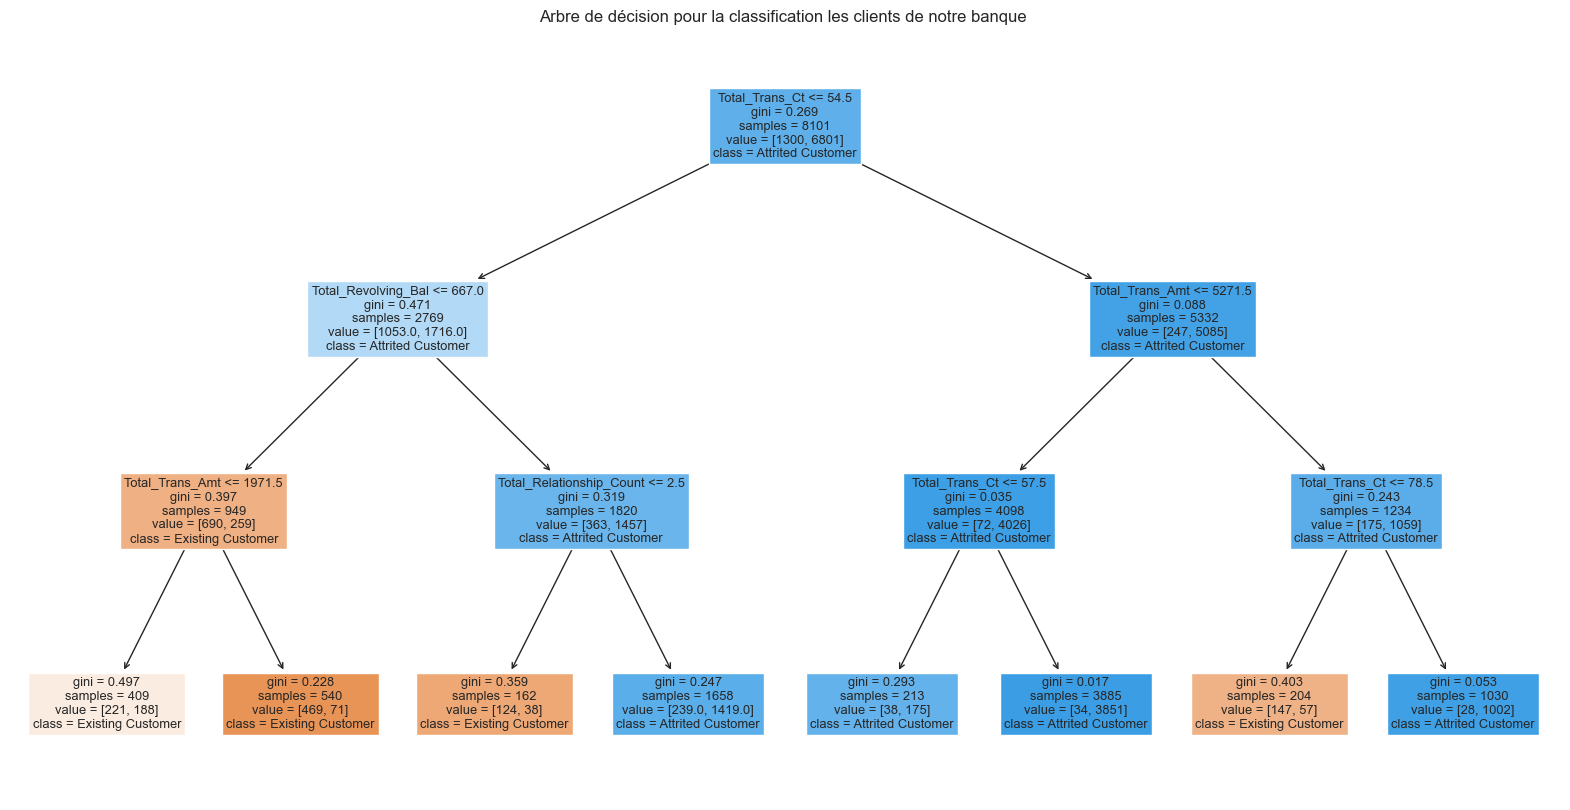

In [35]:
# Tracer l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(clf_tree, filled=True,  feature_names=X_train.columns.tolist(), class_names=["Existing Customer", "Attrited Customer"])
plt.title("Arbre de décision pour la classification les clients de notre banque ")
plt.show()

## Description de noued racine:
- "Total_Trans_Ct " designe le nombre total de transactions effectuées sur un compte, c'est le point de depart de l'arbre. il represente l'ensemble complet de donnees a classer.
- la condition de division c'est la regle utilisee pour diviser les donnees en sous groupes. dans ce noeud "Total_Trans_Ct<= 54.4" signifier que les clients ayant moins de 54,5 transactions tendent à être classés comme "Attrited Customer". 
- indice de GINI c'est une mesure de l'homogeneite des echantillons dans un noeud. Plus Gini est proche de zero, plus le noeud est pur, c'est-a-dire qu'il contient principalemnt des echantillons d'une seule classe.
- "samples" c'est le nombre total de donnees dans un noeud speifique de l'arbre. 
- "value" c'est le nombre de valeurs de chaque classe presente dans un noeud. dans le noeud racine value[1300,6801] Parmi ces échantillons, 6801 sont étiquetés comme "Attrited Customer" et 1300 comme "Existing Customer". 


### Interpretation 
En se basant sur l'arbre de décision, les variables clés pour différencier les clients de la banque sont "Total_Trans_Ct", "Total_Trans_Amt", "Total_Revolving_Bal" et "Total_Relationship_Count", permettant de distinguer entre fidèles et résiliants.

###### 1. Les clients qui restent fidèles à la banque sont ceux avec moins ou égal à 54 transactions, une dette de carte de crédit de 667 dollars ou moins et un total de transactions inférieur ou égal à 1971 dollars.

##### 2. Les clients fidèles ont moins ou égal à 54 transactions, une dette de carte de crédit de 667 dollars ou plus et moins de 2 produits bancaires.

##### 3. Les clients fidèles ont entre 54 et 78 transactions, avec une dette de carte de crédit de 5271 dollars ou plus.

##### 4. Les clients quittant la banque ont moins ou égal à 54 transactions, une dette de carte de crédit de 667 dollars ou plus, et plus de 2 produits bancaires.

##### 5. Les clients quittant la banque ont moins de 57 transactions et une dette de carte de crédit de 5271 dollars ou moins.


## logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
data['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

<Axes: xlabel='Attrition_Flag', ylabel='count'>

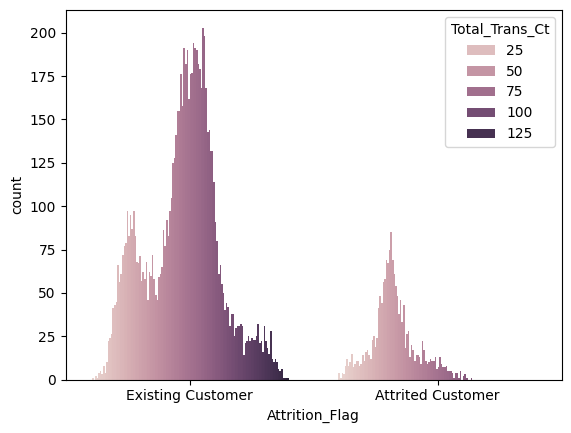

In [7]:
# visualiser le nombre de transactions totales en fonction du drapeau d'attrition (Attrition_Flag)
sns.countplot(x = 'Attrition_Flag',hue = 'Total_Trans_Ct',data = data)

<Axes: xlabel='Attrition_Flag', ylabel='count'>

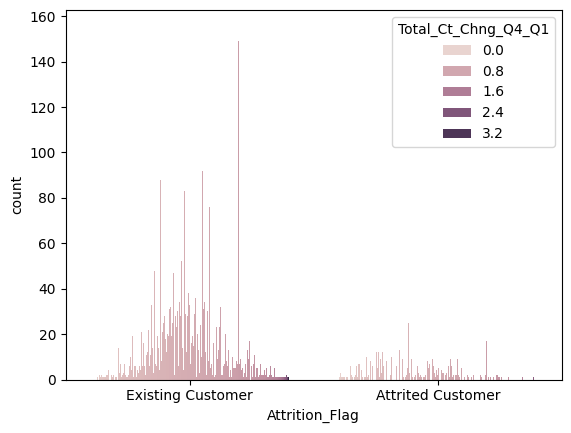

In [8]:
#visualiser la variation du nombre total de transactions effectuées sur une période donnée, en fonction du drapeau d'attrition (Attrition_Flag)
sns.countplot(x = 'Attrition_Flag',hue = 'Total_Ct_Chng_Q4_Q1',data = data)

In [54]:
#Transformer en valeurs numériques pour calculer la corrélation
#Attrition_Flag
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
#Gender
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1})
#Education_Level
education_mapping = {
    'High School': 1,
    'Unknown': 2,
    'Uneducated': 3,
    'College': 4,
    'Graduate': 5,
    'Post-Graduate': 6,
    'Doctorate': 7
}
data['Education_Level'] = data['Education_Level'].map(education_mapping)
# marital status
marital_mapping = {
    'Unknown': 0,
    'Married': 1,
    'Single': 2,
    'Divorced': 3
}
data['Marital_Status'] = data['Marital_Status'].map(marital_mapping)
#income categories
income_mapping = {
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': 0 }
data['Income_Category'] = data['Income_Category'].map(income_mapping)
#card categories
card_mapping = {
    'Blue': 1,
    'Gold': 2,
    'Silver': 3,
    'Platinum': 4
}
data['Card_Category'] = data['Card_Category'].map(card_mapping)

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,0,3,1,1,3,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,1,5,5,2,1,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,0,3,5,1,4,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,1,4,1,0,1,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,0,3,3,1,3,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [55]:
# Calculer la correlation avec la variable target : Attrition_Flag
correlations = data.corr()['Attrition_Flag'].abs().sort_values(ascending=False)
correlations

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Contacts_Count_12_mon       0.204491
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Months_Inactive_12_mon      0.152449
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Gender                      0.037272
Credit_Limit                0.023873
Dependent_count             0.018991
Customer_Age                0.018203
Education_Level             0.015105
Months_on_book              0.013687
Income_Category             0.013577
Marital_Status              0.010026
Card_Category               0.003687
Avg_Open_To_Buy             0.000285
Name: Attrition_Flag, dtype: float64

### Interpretation
###### Total_Trans_Ct (0.371403) : Il y a une corrélation modérée positive entre le nombre total de transactions effectuées sur un compte ou une carte de crédit sur une période donnée et la probabilité de churn (attrition).

###### Total_Ct_Chng_Q4_Q1 (0.290054) : Il y a une corrélation modérée positive entre le changement dans le nombre total de transactions effectuées sur une période donnée et la probabilité de churn.

###### Total_Revolving_Bal (0.263053) : Il y a une corrélation modérée positive entre le montant total dû sur une carte de crédit et la probabilité de churn.

###### Contacts_Count_12_mon (0.204491) : Il y a une corrélation faible positive entre le nombre de fois qu’un client a contacter le service client. et la probabilité de churn.

###### Avg_Utilization_Ratio (0.178410) : Il y a une corrélation faible positive entre la moyenne du pourcentage de crédit utilisé par rapport à la limite de crédit disponible sur une période donnée  et la probabilité de churn.

###### Total_Trans_Amt (0.168598) : Il y a une corrélation faible positive entre le montant total des transactions effectuées sur un compte ou une carte sur une période donnée  et la probabilité de churn.

###### Months_Inactive_12_mon (0.152449) : Il y a une corrélation faible positive entre le nombre de mois d'inactivité au cours des 12 derniers mois et la probabilité de churn.

In [57]:
#supprimer les colonnes dont la correlation est faible avec la variable target
data.drop(['Customer_Age','Gender','Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Avg_Utilization_Ratio','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt'],inplace=True,axis=1)

In [58]:
data.head()

,Attrition_Flag,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,1,42,1.625
1,1,33,3.714
2,1,20,2.333
3,1,20,2.333
4,1,28,2.500


In [59]:
#supprimer la variable target
X = data.drop(['Attrition_Flag'], axis=1)
y = data['Attrition_Flag']

In [60]:
#diviser les données en ensembles d'entraînement et de test
#20% des données seront utilisées comme ensemble de test, et 80% seront utilisées comme ensemble d'entraînement.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# effectuer une standardisation des caractéristiques (features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Entrainement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
# Faire des predictions
y_pred = model.predict(X_test_scaled)

In [64]:
# Evaluer le modele
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8381046396841066


### Interpretation
###### Une précision de 83,81 % signifie que le modèle a correctement classé environ 83,81 % des exemples dans l'ensemble de test

## K-means

##### K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du

dataset. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à

la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.

In [4]:
#extraire les données des colonnes 17 et 18 
X = df.iloc[:, [17, 18]].values

In [5]:
#utiliser la methode elbow  pour trouver le nombre optimal de clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # utiliser la methode inertia
    wcss.append(kmeans.inertia_)

### Remarque
##### WCSS (Within-Cluster Sum of Squares) est une métrique qui mesure la variance intra-cluster. Une faible valeur de WCSS indique que les points d'un cluster sont proches les uns des autres
##### inertia_ de l'objet KMeans retourne la somme des carrés des distances des échantillons à leur centre de cluster le plus proche, ce qui correspond à la valeur de WCSS pour ce modèle

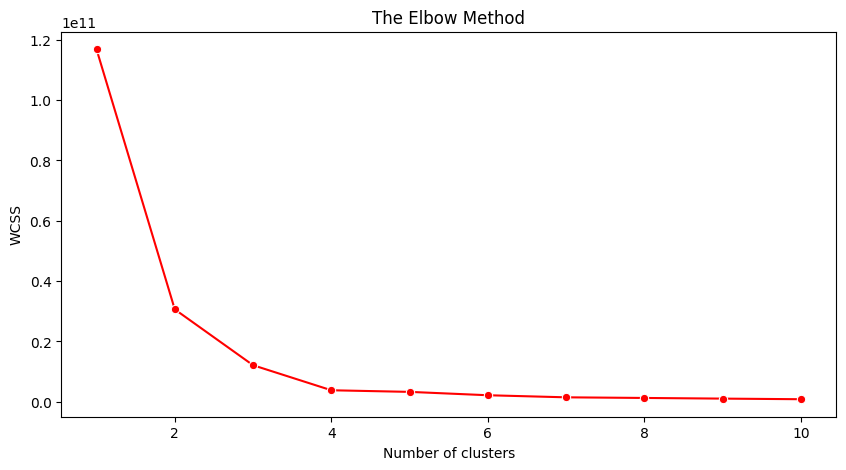

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### interpretation
##### On remarque sur ce graphique ,Le nombre optimal de clusters est le point représentant le coude. Ici le coude peut être représenté par K valant 2. C’est le nombre optimal de clusters

In [7]:
# Adapter K-Means à l'ensemble de données
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

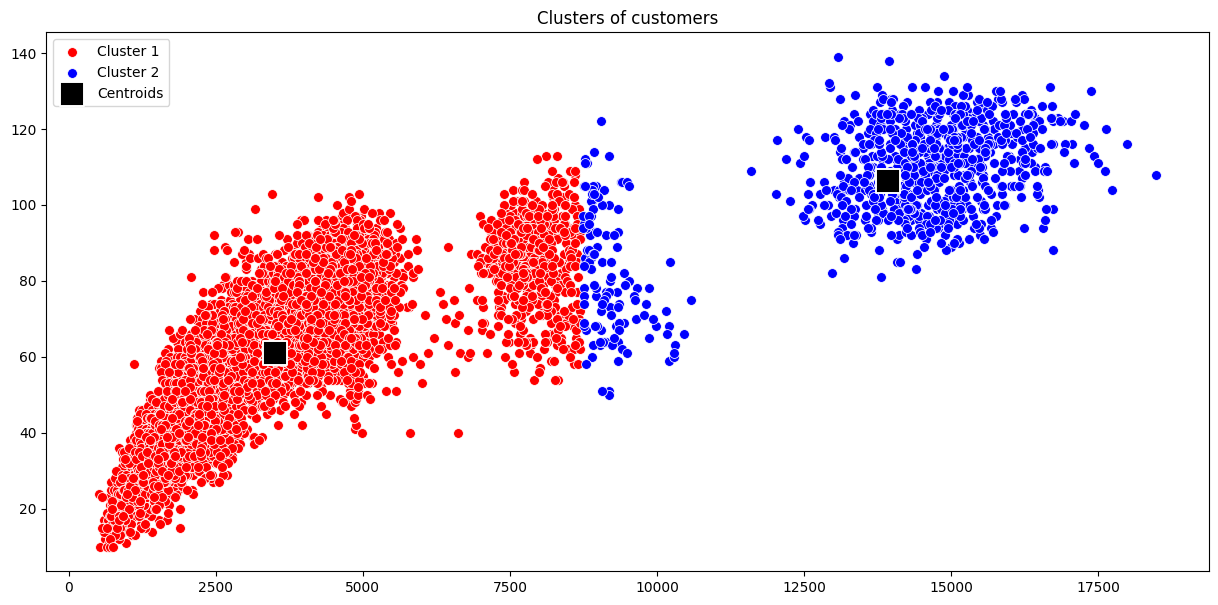

In [8]:
#visualiser les clusters obtenus à partir de l'algorithme K-Means
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='red', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black',
                label='Centroids', s=300, marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()


### interpretation
#### En observant le graphique, nous notons une disparité dans le nombre de points attribués à chaque cluster. Le cluster 1 contient un nombre plus élevé de points que le cluster 2. Cette observation suggère que le cluster 1 correspond à la catégorie des clients existants (Existing Customer), tandis que le cluster 2 correspond à la catégorie des clients ayant résilié (Attrited Customer)